In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/ARIMA/major-tech-stock-2019-2024.csv"

--2024-12-09 09:34:14--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/ARIMA/major-tech-stock-2019-2024.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 719850 (703K) [text/plain]
Saving to: ‘major-tech-stock-2019-2024.csv’

major-tech-stock-20 100%[===================>] 702.98K  --.-KB/s    in 0.06s   

2024-12-09 09:34:14 (11.5 MB/s) - ‘major-tech-stock-2019-2024.csv’ saved [719850/719850]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import itertools

In [3]:
data = pd.read_csv('major-tech-stock-2019-2024.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793785,148158800,AAPL
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800,AAPL
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481926,234428400,AAPL
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200,AAPL
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077847,164101200,AAPL


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6290 non-null   object 
 1   Open       6290 non-null   float64
 2   High       6290 non-null   float64
 3   Low        6290 non-null   float64
 4   Close      6290 non-null   float64
 5   Adj Close  6290 non-null   float64
 6   Volume     6290 non-null   int64  
 7   Ticker     6290 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 393.2+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data['Ticker'].unique()

array(['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA'], dtype=object)

In [8]:
tech_ticker = list(data['Ticker'].unique())

In [9]:
print(tech_ticker)

['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']


In [10]:
filtered_data = data[data['Ticker'].isin(tech_ticker)]

In [11]:
filtered_data = filtered_data.sort_values(by = ['Ticker','Date'])

In [12]:
stock_ticker = 'AAPL'
stock_data = filtered_data[filtered_data['Ticker'] == stock_ticker][['Date','Close']]
stock_data.set_index('Date',inplace = True)

In [13]:
def check_stationary_series(series):
  result = adfuller(series)
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary. Differencing is required..')

In [14]:
check_stationary_series(stock_data['Close'])

ADF Statistic: -1.2464894203980126
p-value: 0.6532844727059052
The series is not stationary. Differencing is required..


In [15]:
stock_data_diff = stock_data['Close'].diff().dropna()

In [16]:
stock_data_diff.name = stock_data_diff.name.strip()

In [17]:
stock_data_diff.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1257 entries, 2019-01-03 to 2023-12-29
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1257 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB


In [18]:
check_stationary_series(stock_data_diff)

ADF Statistic: -36.97978302205241
p-value: 0.0
The series is stationary


In [19]:
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))

In [20]:
def evaluate_arima(pdq, stock_data_diff):
  best_aic = float('inf')
  best_bic = float('inf')
  best_model = None
  best_order = None
  best_rmse = float('inf')

  for order in pdq:
    try:
      model = ARIMA(stock_data_diff, order = order)
      model_fit = model.fit()
      aic = model_fit.aic
      bic = model_fit.bic
      pred = model_fit.predict(start = 0, end = len(stock_data_diff) - 1)
      rmse = np.sqrt(mean_squared_error(stock_data_diff, pred))
      if aic < best_aic :
        best_aic = aic
        best_bic = bic
        best_model = model_fit
        best_order = order
        best_rmse = rmse
    except:
      continue
  return best_model, best_order,best_aic, best_bic, best_rmse

In [21]:
best_model, best_order,best_aic, best_bic, best_rmse = evaluate_arima(pdq, stock_data_diff)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
print(f"Best ARIMA model: ARIMA{best_order}")
print(f"Best AIC: {best_aic}")
print(f"Best BIC: {best_bic}")
print(f"Best RMSE: {best_rmse}")

Best ARIMA model: ARIMA(0, 0, 1)
Best AIC: 5764.029242600787
Best BIC: 5779.438692226558
Best RMSE: 2.3903707629214974


In [23]:
forecast_steps = 30
forecast = best_model.get_forecast(steps = forecast_steps)
forecast_index = pd.date_range(start = stock_data_diff.index[-1], periods = forecast_steps+1, freq = 'B')[1:]
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


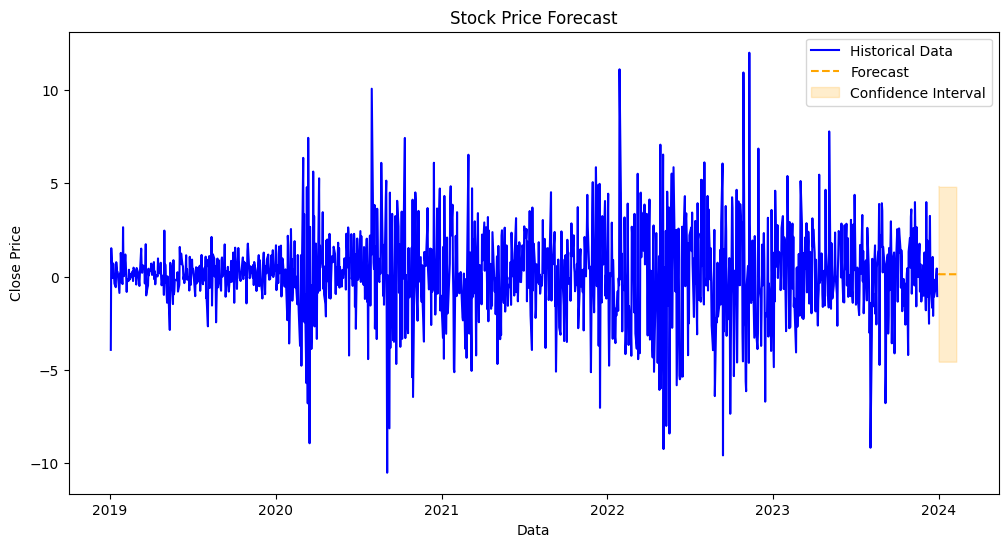

In [25]:
plt.figure(figsize = (12,6))
plt.plot(stock_data_diff, label = 'Historical Data', color = 'blue')
plt.plot(forecast_index, forecast_mean, label = 'Forecast', color = 'orange', linestyle = '--')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color = 'orange', alpha = 0.2, label = 'Confidence Interval')
plt.title('Stock Price Forecast')
plt.xlabel('Data')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [26]:
last_actual_price = stock_data['Close'].iloc[-1]

In [27]:
original_forecast = forecast_mean.cumsum() + last_actual_price

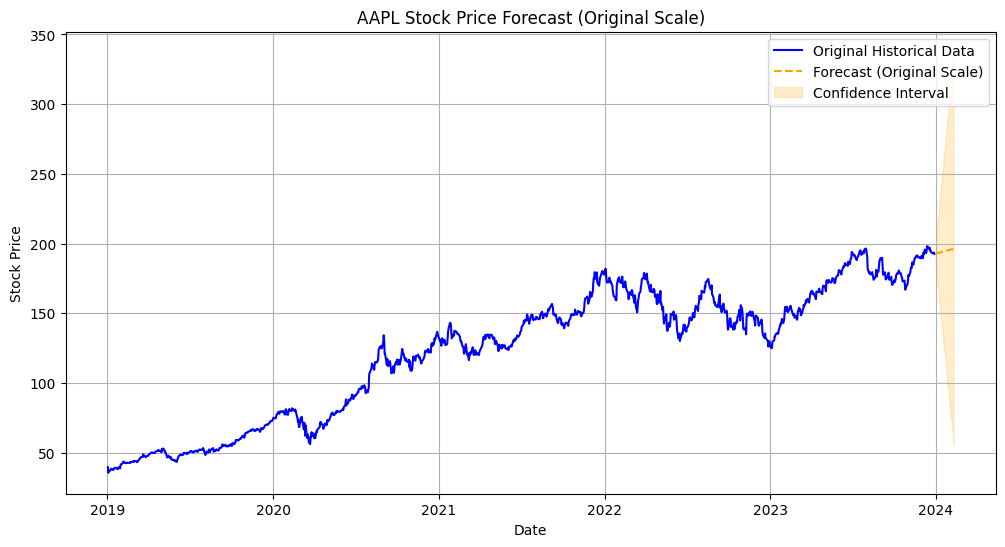

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Original Historical Data', color='blue')
plt.plot(forecast_index, original_forecast, label='Forecast (Original Scale)', color='orange', linestyle='--')
plt.fill_between(forecast_index,
                 (forecast_ci.iloc[:, 0].cumsum() + last_actual_price),
                 (forecast_ci.iloc[:, 1].cumsum() + last_actual_price),
                 color='orange', alpha=0.2, label='Confidence Interval')
plt.title(f'{stock_ticker} Stock Price Forecast (Original Scale)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()